# Importing libraries

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

# reading data

In [3]:
churnData = pd.read_csv('Customer-Churn.csv')
churnData.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0             No          Yes               No          No          No   
1            Yes           No              Yes          No          No   
2            Yes          Yes               No          No          No   
3            Yes           No              Yes         Yes          No   
4             No           No               No          No          No   

  StreamingMovies        Contract  MonthlyCharges TotalCharges Churn  
0              No  Month-to-month           29.85        29.85    No  
1              No        One year           56.95       1889.5    No  
2              No  Month-to-month           53.85       108.15   Yes  
3              No        One year           42.30      1840.75    No  
4              No  Month-to-month           70.70       151.65   Yes

# checking types and changing TotalCharges to numerical

In [5]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'],errors='coerce')

# check for NaN values

In [14]:
churnData.isna().sum()/len(churnData)

gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

In [ ]:
#Only TotalCharges has NaN values, and it's 0.15% so a very low proportion. 
#Will check the distribution of TotalCharges to be sure

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

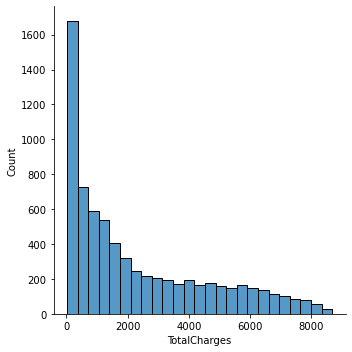

In [12]:
sns.displot(churnData['TotalCharges'])
plt.show()

In [ ]:
#Will fill the NaNs with the mean of TotalCharges, that won't skew the data much, especially considering the low proportion. 

In [15]:
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(np.mean(churnData['TotalCharges']))

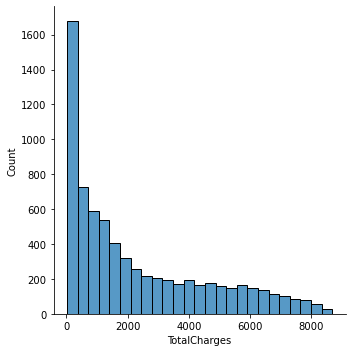

In [16]:
#just checking
sns.displot(churnData['TotalCharges'])
plt.show()

# Scale and model

In [ ]:
#first separate and scale the features

In [ ]:
#Selecting the features as indicated in lab

In [35]:
mod_data = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges','TotalCharges','Churn']]
mod_data.head()

tenure  SeniorCitizen  MonthlyCharges  TotalCharges Churn
0       1              0           29.85         29.85    No
1      34              0           56.95       1889.50    No
2       2              0           53.85        108.15   Yes
3      45              0           42.30       1840.75    No
4       2              0           70.70        151.65   Yes

In [ ]:
#splitting X and y

In [36]:
X = mod_data.drop(columns=['Churn'])
y = mod_data['Churn']

In [ ]:
#Doing the train/test split

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Fitting scaler on X_train then transforming both X_train and X_test

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Running the logistic regression model

In [41]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr')
classification.fit(X_train_scaled, y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [ ]:
#Checking the accuracy on the test data

In [42]:
predictions = classification.predict(X_test_scaled)
predictions
classification.score(X_test_scaled, y_test)

0.8034066713981547

# Managing inbalance

In [ ]:
#Check for the imbalance

In [44]:
churnData['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
#the data is very inbalanced (luckily for the company! but unlucky for our analysis)

In [ ]:
#Will try oversampling first (especially since our dataset is small to start with!)

In [45]:
churn_no = mod_data[mod_data['Churn'] == 'No']
churn_yes = mod_data[mod_data['Churn'] == 'Yes']

In [47]:
from sklearn.utils import resample
churn_yes_oversampled = resample(churn_yes, replace = True, n_samples = len(churn_no))

In [50]:
print(churn_no.shape)
print(churn_yes_oversampled.shape)

(5174, 5)
(5174, 5)


In [51]:
mod_data_oversampled = pd.concat([churn_no, churn_yes_oversampled], axis=0)

In [52]:
mod_data_oversampled['Churn'].value_counts()

No     5174
Yes    5174
Name: Churn, dtype: int64

In [ ]:
#Now that we've oversampled, we need to scale and model to test the results against "imbalanced" model results. 

In [53]:
X_over = mod_data_oversampled.drop(columns=['Churn'])
y_over = mod_data_oversampled['Churn']

In [54]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [55]:
scaler_over=MinMaxScaler().fit(X_train_over)
X_train_scaled_over = scaler_over.transform(X_train_over)
X_test_scaled_over = scaler_over.transform(X_test_over)

In [56]:
classification_over = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr')
classification_over.fit(X_train_scaled_over, y_train_over)

LogisticRegression(multi_class='ovr', random_state=0)

In [57]:
predictions_over = classification_over.predict(X_test_scaled_over)
predictions_over
classification.score(X_test_scaled_over, y_test_over)

0.6859903381642513

In [ ]:
#Now let's undersample, see if we can get a better score (oversampling did not improve the score). 

In [58]:
churn_no_undersampled = resample(churn_no, replace = False, n_samples = len(churn_yes))

In [59]:
print(churn_yes.shape)
print(churn_no_undersampled.shape)

(1869, 5)
(1869, 5)


In [60]:
mod_data_undersampled = pd.concat([churn_yes, churn_no_undersampled], axis=0)

In [62]:
mod_data_undersampled['Churn'].value_counts()

Yes    1869
No     1869
Name: Churn, dtype: int64

In [ ]:
#And we model again! 

In [63]:
X_under = mod_data_undersampled.drop(columns=['Churn'])
y_under = mod_data_undersampled['Churn']

In [64]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

In [65]:
scaler_under=MinMaxScaler().fit(X_train_under)
X_train_scaled_under = scaler_under.transform(X_train_under)
X_test_scaled_under = scaler_under.transform(X_test_under)

In [66]:
classification_under = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr')
classification_under.fit(X_train_scaled_under, y_train_under)

LogisticRegression(multi_class='ovr', random_state=0)

In [67]:
predictions_under = classification_under.predict(X_test_scaled_under)
predictions_under
classification_under.score(X_test_scaled_under, y_test_under)

0.7179144385026738